In [1]:
from supervised_utils import *
from tabulate import tabulate

In [2]:
# sopprimi i warning a runtime
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Task di regressione su `score`

#### Sul dataset iniziale `movies_adj.csv`

In [4]:
df = pd.read_csv("../data/movies_adj.csv")
print_info(df)

+----------+---------+
|  Column  |  Type   |
+----------+---------+
|    id    |  int64  |
|  title   | object  |
|  rating  | object  |
|  genre   | object  |
|   year   |  int64  |
|  score   | float64 |
|  votes   | float64 |
| director | object  |
|   star   | object  |
| country  | object  |
|  budget  | float64 |
|  gross   | float64 |
| company  | object  |
| runtime  | float64 |
+----------+---------+
# rows: 5436


In [5]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title", "company", "country", "director", "star"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime"],
    "minmax": ["votes", "budget", "gross"]
}

________________________________________________________________________________
TUNING & TRAINING [Ridge Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.5650}

> TESTING...
MSE: 0.4908, MAE: 0.5280

________________________________________________________________________________
TUNING & TRAINING [Decision Tree Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5634}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.5515}



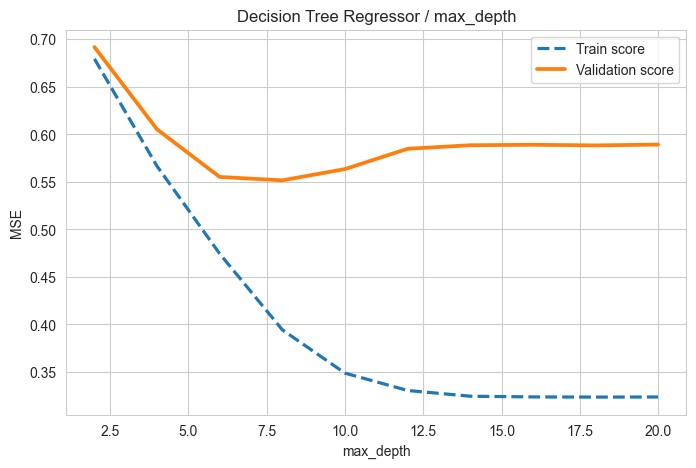

> TESTING...
MSE: 0.5015, MAE: 0.5267

________________________________________________________________________________
TUNING & TRAINING [Random Forest Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score: {'mean_squared_error': 0.4394}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 240}
Best score: {'mean_squared_error': 0.4404}



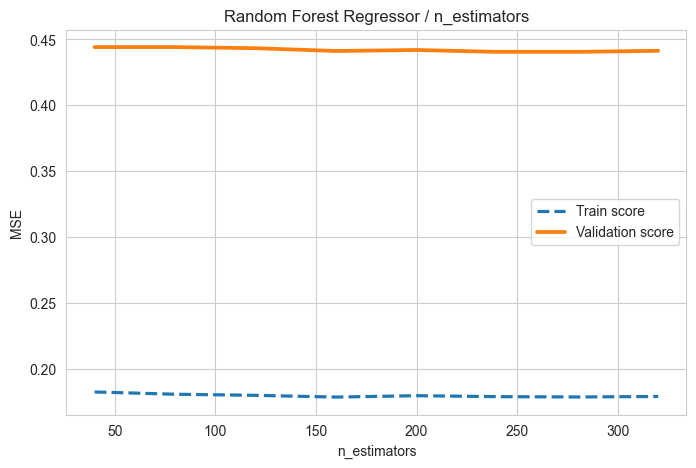

Results after max_depth tuning:
Best parameters: {'max_depth': 21}
Best score: {'mean_squared_error': 0.4403}



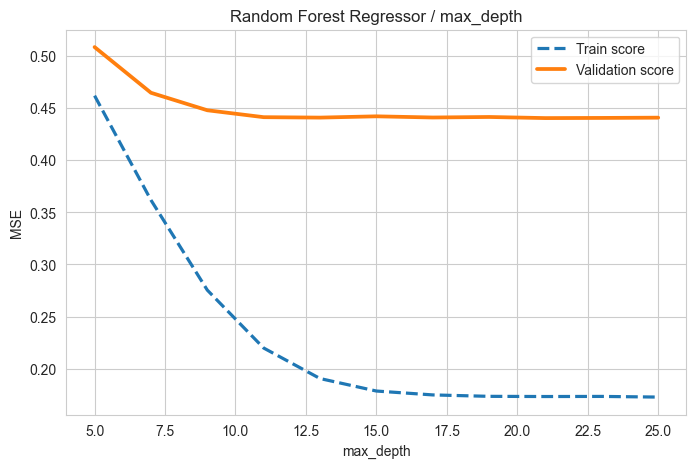

> TESTING...
MSE: 0.3558, MAE: 0.4391

________________________________________________________________________________
TUNING & TRAINING [XGBoost Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.4174}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 160}
Best score: {'mean_squared_error': 0.4169}



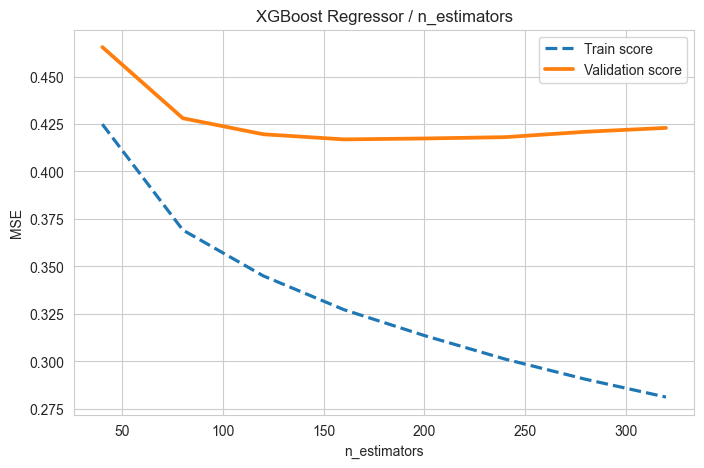

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.4190}



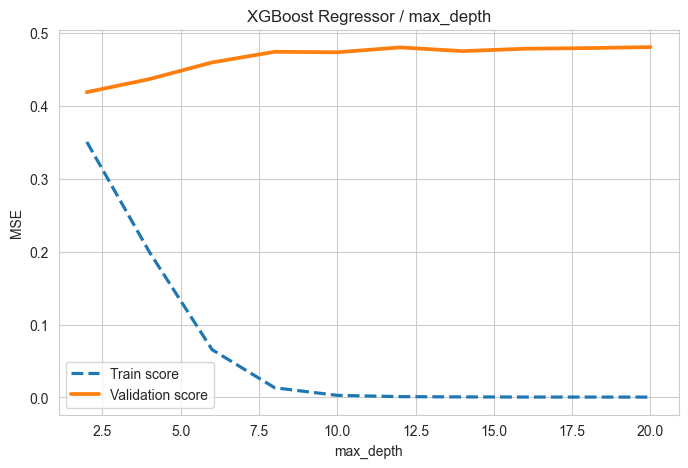

> TESTING...
MSE: 0.3872, MAE: 0.4599



In [6]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="raw")

#### Sul dataset derivato `movies_features.csv`

In [7]:
df = pd.read_csv("../data/movies_features.csv")
print_info(df)

+----------------------------+---------+
|           Column           |  Type   |
+----------------------------+---------+
|             id             |  int64  |
|           title            | object  |
|           rating           | object  |
|           genre            | object  |
|          runtime           | object  |
|            age             |  int64  |
|         popularity         | object  |
|           score            | float64 |
|        is_acclaimed        |  bool   |
|         is_panned          |  bool   |
|     budget_efficiency      | object  |
|       is_blockbuster       |  bool   |
|          is_indie          |  bool   |
|   director_age_in_movie    | float64 |
|    director_experience     |  int64  |
|   director_is_acclaimed    |  bool   |
|     director_is_panned     |  bool   |
| director_budget_efficiency | float64 |
|     star_age_in_movie      | float64 |
|      star_experience       |  int64  |
|     star_is_acclaimed      |  bool   |
|       star_is_

In [8]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title", "is_acclaimed", "is_panned"],
    "dummies": ["rating", "genre", "runtime", "popularity", "budget_efficiency"],
    "labels": [],
    "standardize": ["director_age_in_movie", "star_age_in_movie"],
    "minmax": ["director_experience", "star_experience"]
}

________________________________________________________________________________
TUNING & TRAINING [Ridge Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 5}
Best score: {'mean_squared_error': 0.5313}

> TESTING...
MSE: 0.4581, MAE: 0.5193

________________________________________________________________________________
TUNING & TRAINING [Decision Tree Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.6468}

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.6457}



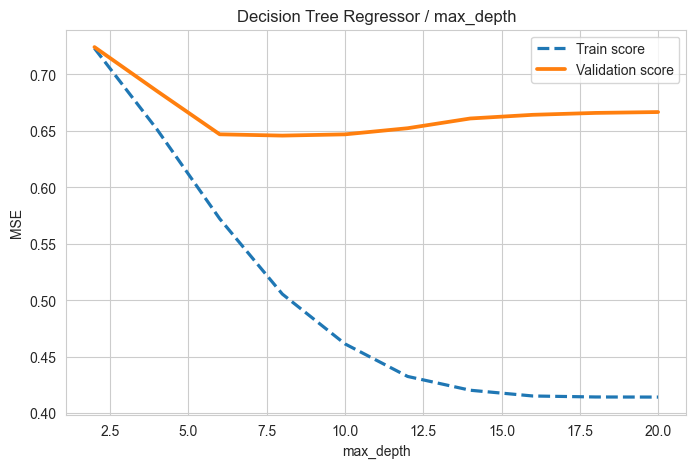

> TESTING...
MSE: 0.6045, MAE: 0.5941

________________________________________________________________________________
TUNING & TRAINING [Random Forest Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best score: {'mean_squared_error': 0.5315}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 280}
Best score: {'mean_squared_error': 0.5306}



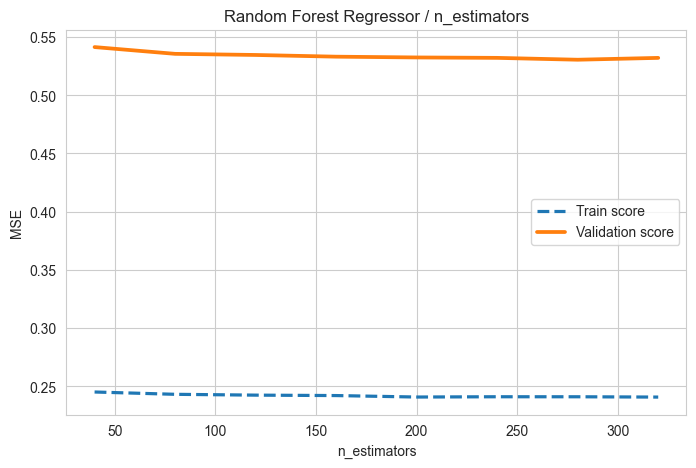

Results after max_depth tuning:
Best parameters: {'max_depth': 13}
Best score: {'mean_squared_error': 0.5310}



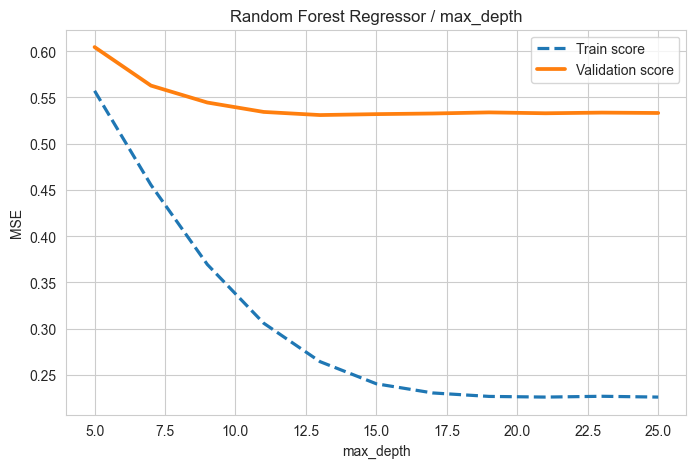

> TESTING...
MSE: 0.4624, MAE: 0.5201

________________________________________________________________________________
TUNING & TRAINING [XGBoost Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Best score: {'mean_squared_error': 0.5102}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 80}
Best score: {'mean_squared_error': 0.5090}



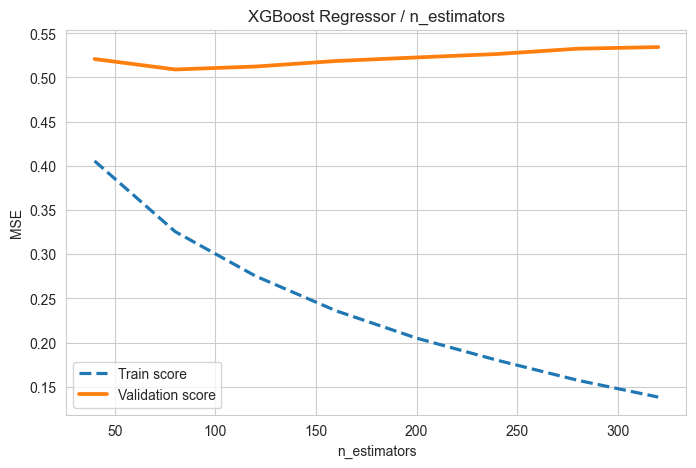

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.5140}



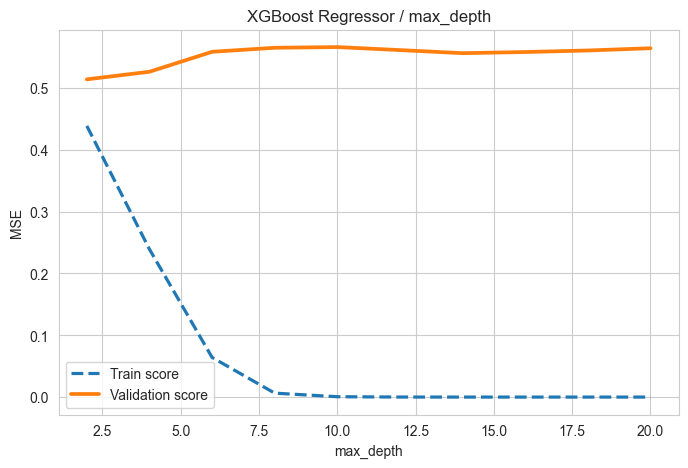

> TESTING...
MSE: 0.5124, MAE: 0.5471



In [9]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="der")

### Task di classificazione su `budget_efficiency`

#### Sul dataset iniziale `movies_adj.csv`

In [4]:
adj_df = pd.read_csv("../data/movies_adj.csv")
features_df = pd.read_csv("../data/movies_features.csv")
df = adj_df.merge(features_df[["id", "budget_efficiency"]], on="id", how="inner")

df = df[list(adj_df.columns) + ["budget_efficiency"]]
print_info(df)

+-------------------+---------+
|      Column       |  Type   |
+-------------------+---------+
|        id         |  int64  |
|       title       | object  |
|      rating       | object  |
|       genre       | object  |
|       year        |  int64  |
|       score       | float64 |
|       votes       | float64 |
|     director      | object  |
|       star        | object  |
|      country      | object  |
|      budget       | float64 |
|       gross       | float64 |
|      company      | object  |
|      runtime      | float64 |
| budget_efficiency | object  |
+-------------------+---------+
# rows: 5436


In [5]:
# colonne per il training
cols = {
    "target": "budget_efficiency",
    "drop": ["id", "title", "company", "country", "director", "star", "gross"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime", "score"],
    "minmax": ["votes", "budget"]
}

________________________________________________________________________________
TUNING & TRAINING [Logistic Regression]...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best score: {'accuracy': 0.4602}

> TESTING...
Accuracy: 0.4706


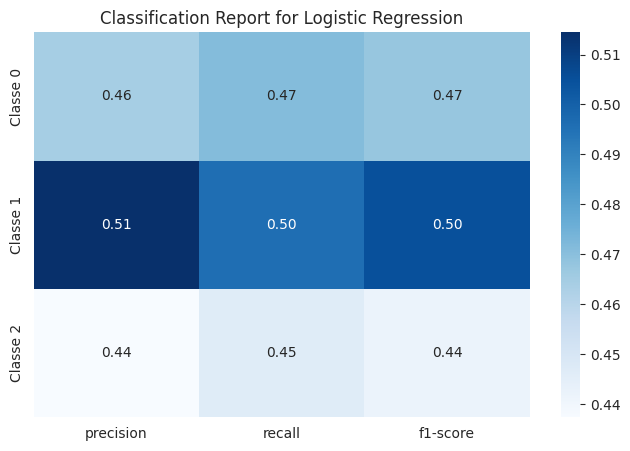

________________________________________________________________________________
TUNING & TRAINING [Decision Tree Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'accuracy': 0.5816}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5828}



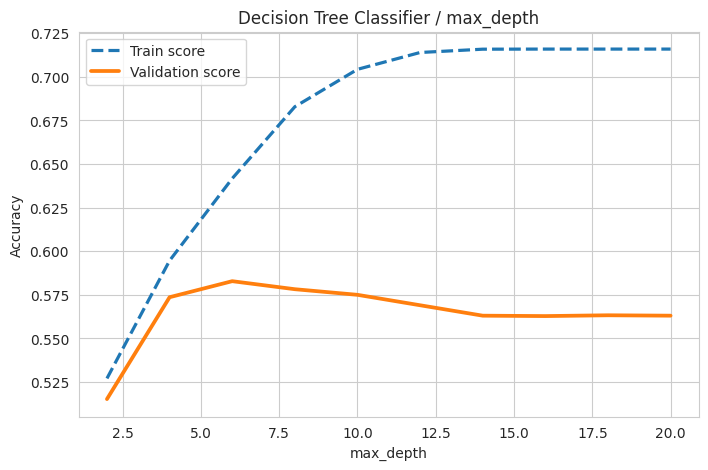

> TESTING...
Accuracy: 0.5717


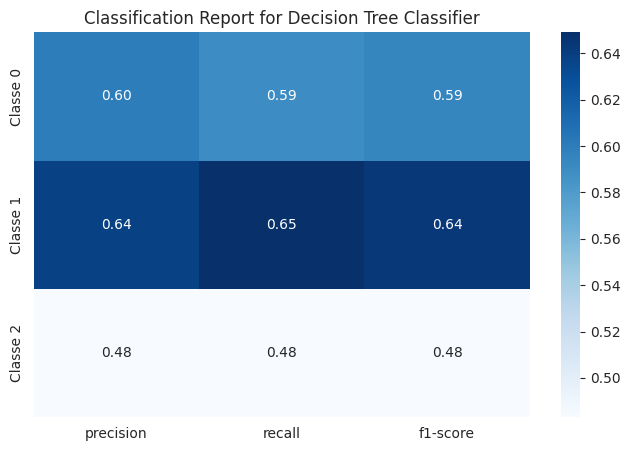

________________________________________________________________________________
TUNING & TRAINING [Random Forest Classifier]...



KeyboardInterrupt: 

In [6]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="raw")

#### Sul dataset derivato `movies_features.csv`

In [13]:
df = pd.read_csv("../data/movies_features.csv")
print_info(df)

+----------------------------+---------+
|           Column           |  Type   |
+----------------------------+---------+
|             id             |  int64  |
|           title            | object  |
|           rating           | object  |
|           genre            | object  |
|          runtime           | object  |
|            age             |  int64  |
|         popularity         | object  |
|           score            | float64 |
|        is_acclaimed        |  bool   |
|         is_panned          |  bool   |
|     budget_efficiency      | object  |
|       is_blockbuster       |  bool   |
|          is_indie          |  bool   |
|   director_age_in_movie    | float64 |
|    director_experience     |  int64  |
|   director_is_acclaimed    |  bool   |
|     director_is_panned     |  bool   |
| director_budget_efficiency | float64 |
|     star_age_in_movie      | float64 |
|      star_experience       |  int64  |
|     star_is_acclaimed      |  bool   |
|       star_is_

In [14]:
# colonne per il training
cols = {
    "target": "budget_efficiency",
    "drop": ["id", "title"],
    "dummies": ["rating", "genre", "runtime", "popularity"],
    "labels": [],
    "standardize": ["score", "director_age_in_movie", "star_age_in_movie"],
    "minmax": ["director_experience", "star_experience"]
}

________________________________________________________________________________
TUNING & TRAINING [Logistic Regression]...



C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results after GridSearchCV:
Best parameters: {'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.5699}

> TESTING...
Accuracy: 0.5744


C:\Users\raffa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


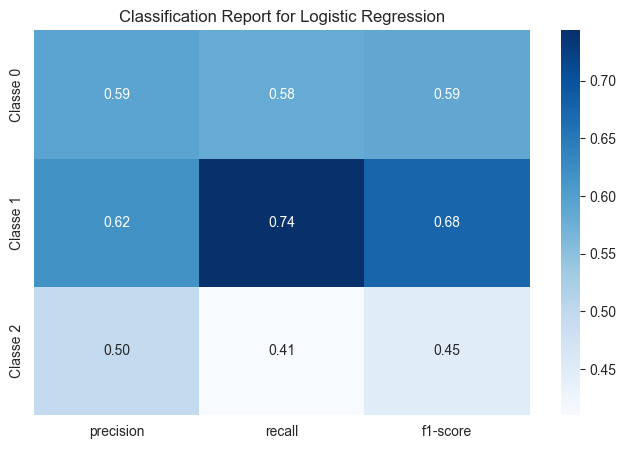

________________________________________________________________________________
TUNING & TRAINING [Decision Tree Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'accuracy': 0.5458}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5531}



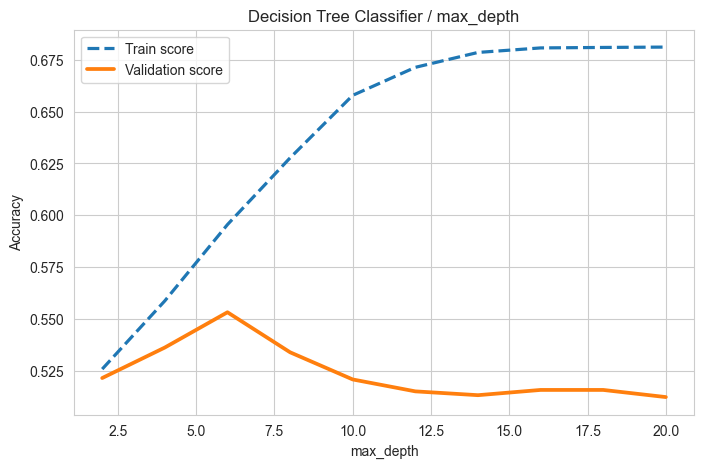

> TESTING...
Accuracy: 0.5138


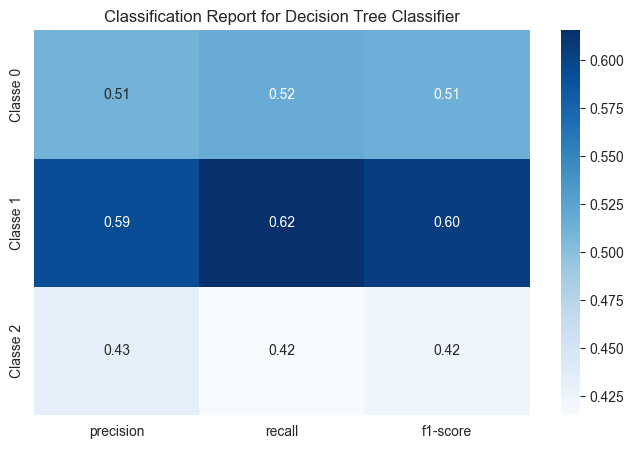

________________________________________________________________________________
TUNING & TRAINING [Random Forest Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: {'accuracy': 0.5863}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 80}
Best score: {'accuracy': 0.5835}



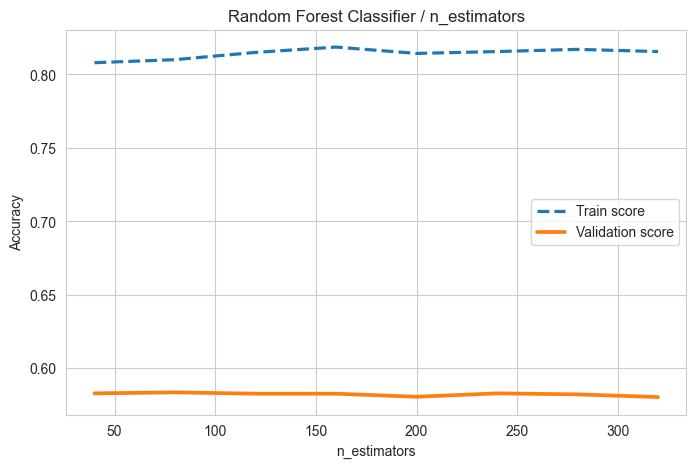

Results after max_depth tuning:
Best parameters: {'max_depth': 25}
Best score: {'accuracy': 0.5839}



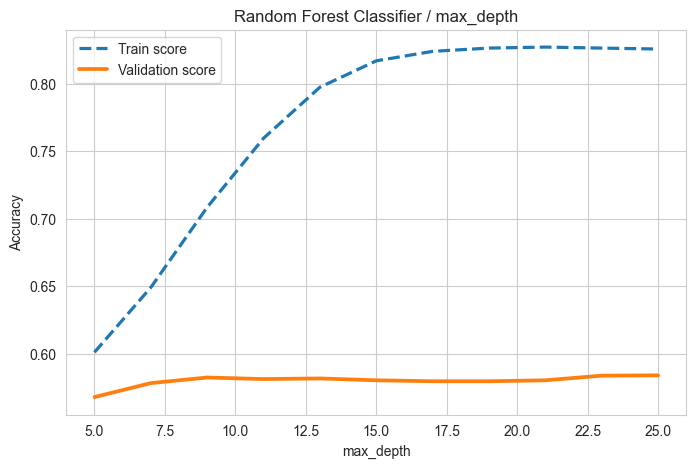

> TESTING...
Accuracy: 0.5653


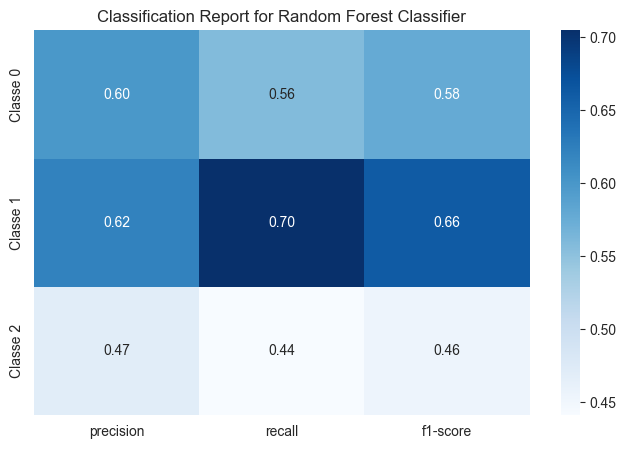

________________________________________________________________________________
TUNING & TRAINING [XGBoost Classifier]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1}
Best score: {'accuracy': 0.5856}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'accuracy': 0.5856}



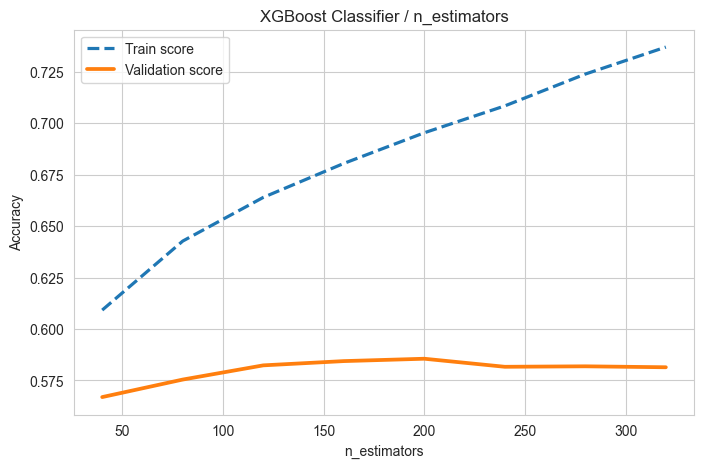

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.5821}



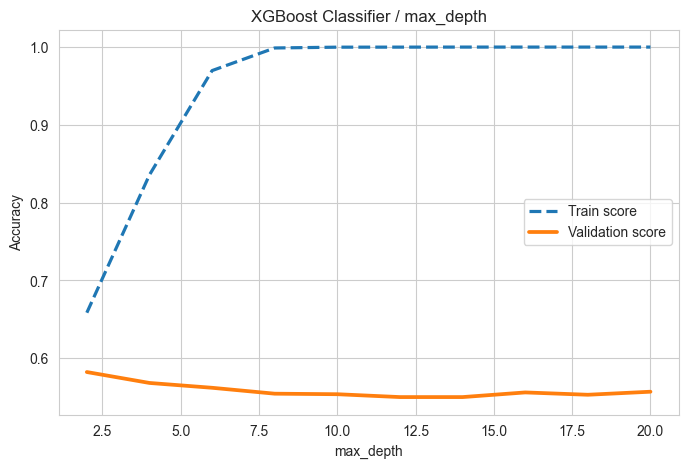

> TESTING...
Accuracy: 0.5506


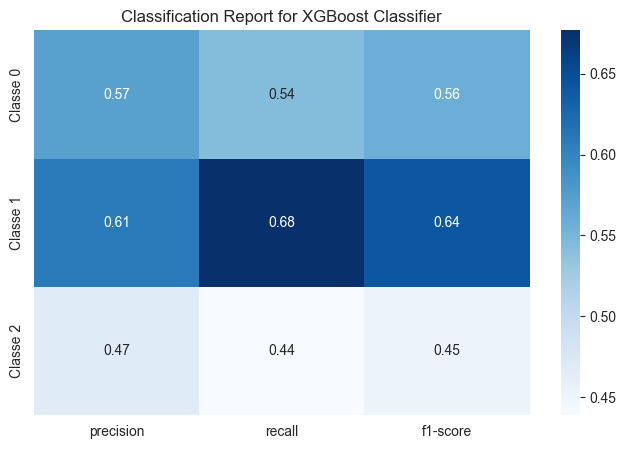

In [15]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="der")